In [1]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

- load datas

In [2]:
train_folder_path = Path("../data/cats_and_dogs_filtered/train")
test_folder_path = Path("../data/cats_and_dogs_filtered/validation")

cats_train_path = train_folder_path / "cats"
dogs_train_path = train_folder_path / "dogs"

cats_test_path = test_folder_path / "cats"
dogs_test_path = test_folder_path / "dogs"

In [3]:
cats_train = os.listdir(cats_train_path)
dogs_train = os.listdir(dogs_train_path)
cats_test = os.listdir(cats_test_path)
dogs_test = os.listdir(dogs_test_path)

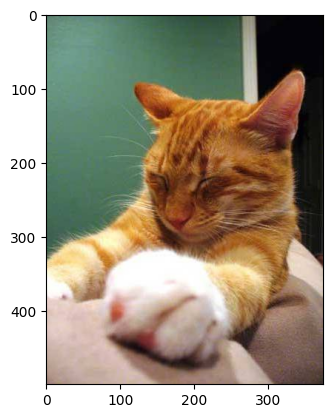

In [4]:
temp = plt.imread(cats_train_path / cats_train[50])
plt.imshow(temp)

---

In [5]:
layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    # tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    # tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(2,2),   

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron.
    # It will contain a value from 0-1 where 0 for 1 class ('cats')
    # and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
]

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model = tf.keras.models.Sequential(layers)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,729 (12.63 MB)

 Trainable params: 3,309,729 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_folder_path, batch_size=20, class_mode='binary', target_size=(150, 150))
validation_generator = test_datagen.flow_from_directory(test_folder_path, batch_size=20, class_mode='binary', target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=15, validation_data=validation_generator, validation_steps=50, verbose=2)

Epoch 1/15


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 17s - 169ms/step - accuracy: 0.5260 - loss: 0.7058 - val_accuracy: 0.5410 - val_loss: 0.6900
Epoch 2/15
100/100 - 0s - 544us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 - 12s - 120ms/step - accuracy: 0.5790 - loss: 0.6852 - val_accuracy: 0.5760 - val_loss: 0.6681
Epoch 4/15
100/100 - 0s - 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
100/100 - 12s - 123ms/step - accuracy: 0.6545 - loss: 0.6333 - val_accuracy: 0.6720 - val_loss: 0.6079
Epoch 6/15
100/100 - 0s - 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15
100/100 - 12s - 123ms/step - accuracy: 0.6895 - loss: 0.5832 - val_accuracy: 0.7160 - val_loss: 0.5746
Epoch 8/15
100/100 - 0s - 150us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/15
100/100 - 12s - 120ms/step - accuracy: 0.7190 - loss: 0.5427 - val_accuracy: 0.7230 - val_loss: 0.5411
Epoch 10/15
100/100 - 0s - 140us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/15
100/100 - 12s - 120ms/step

- predict with CNN

In [64]:
from keras.preprocessing import image
from sklearn.metrics import accuracy_score

fn = Path("test_data")

y_labels = []
img_array = []
for name in os.listdir(fn):
    if ("cat" in name):
        y_labels.append(0)
    elif ("dog" in name):
        y_labels.append(1)
    
    path_to_img = fn / name
    img=image.load_img(path_to_img, target_size=(150, 150))
    x=image.img_to_array(img)

    x /= 255

    img_array.append(x)

img_array = np.array(img_array)
classes = model.predict(img_array)
# img_array.shape
classes = classes.flatten()

y_pred = np.array(classes > 0.5, dtype=int)
acc = accuracy_score(y_labels, y_pred)
acc
# classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


0.75